# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = time.ctime(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | hotan
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | ta`u
Processing Record 7 of Set 1 | kurmuk
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | nishinoomote
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | mangai
Processing Record 16 of Set 1 | labasa
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | dul'durga
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | saint-jean-de-monts
Processing Record 22 of Set 1 | dunkwa
Processing Record 23 of Set 1 | saint-pierre
P

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.columns = map(lambda x: str(x).title(), city_data_df.columns)
city_data_df["City"] = city_data_df["City"].str.title()

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilibino,68.0546,166.4372,-11.29,86,11,4.97,RU,Mon Oct 30 02:59:16 2023
1,Albany,42.6001,-73.9662,45.64,93,100,1.99,US,Mon Oct 30 02:57:50 2023
2,Hotan,37.0997,79.9269,73.24,11,0,4.54,CN,Mon Oct 30 02:59:16 2023
3,Lata,40.1629,-8.3327,52.07,87,72,3.69,PT,Mon Oct 30 02:59:16 2023
4,Lebu,-37.6167,-73.6500,45.79,62,95,4.85,CL,Mon Oct 30 02:59:16 2023


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv", index_label="City_ID")
# cwd = os.getcwd()
# print(cwd)

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bilibino,68.0546,166.4372,-11.29,86,11,4.97,RU,Mon Oct 30 02:59:16 2023
1,Albany,42.6001,-73.9662,45.64,93,100,1.99,US,Mon Oct 30 02:57:50 2023
2,Hotan,37.0997,79.9269,73.24,11,0,4.54,CN,Mon Oct 30 02:59:16 2023
3,Lata,40.1629,-8.3327,52.07,87,72,3.69,PT,Mon Oct 30 02:59:16 2023
4,Lebu,-37.6167,-73.6500,45.79,62,95,4.85,CL,Mon Oct 30 02:59:16 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

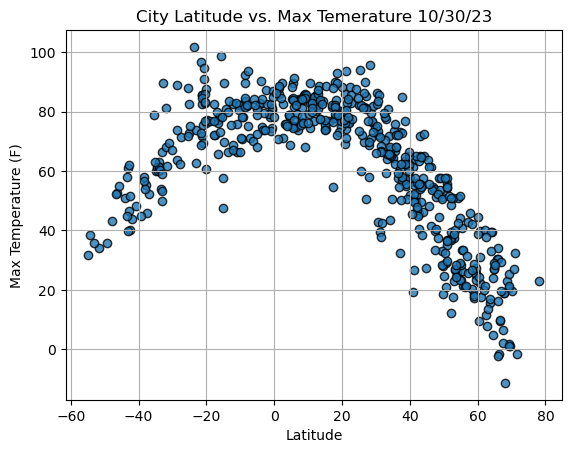

In [26]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,
            max_temps,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temerature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

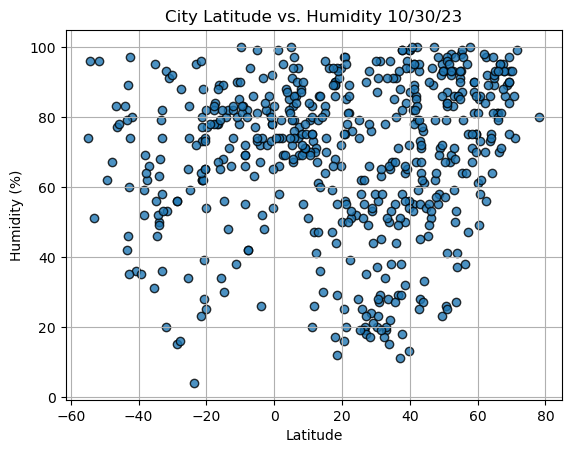

In [27]:
plt.scatter(lats,
            humidity,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

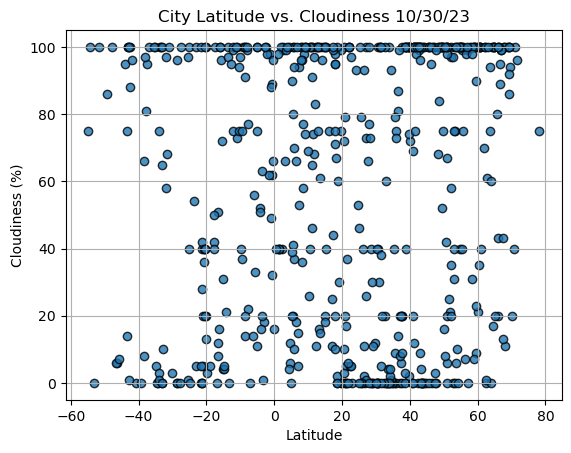

In [28]:
plt.scatter(lats,
            cloudiness,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

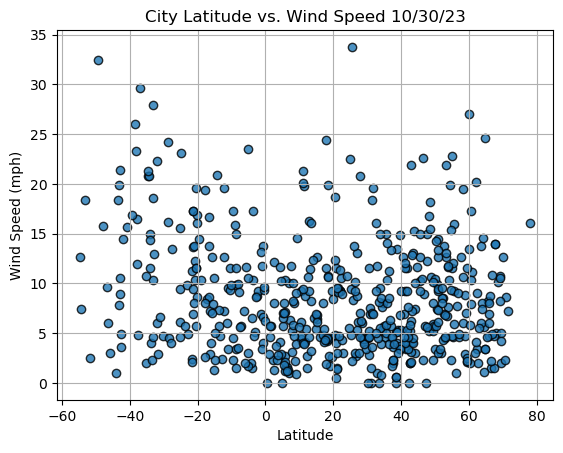

In [29]:
plt.scatter(lats,
            wind_speed,
            edgecolors="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r")

    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-value is: {r_value}")
    plt.show()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bilibino,68.0546,166.4372,-11.29,86,11,4.97,RU,Mon Oct 30 02:59:16 2023
1,Albany,42.6001,-73.9662,45.64,93,100,1.99,US,Mon Oct 30 02:57:50 2023
2,Hotan,37.0997,79.9269,73.24,11,0,4.54,CN,Mon Oct 30 02:59:16 2023
3,Lata,40.1629,-8.3327,52.07,87,72,3.69,PT,Mon Oct 30 02:59:16 2023
6,Kurmuk,10.5500,34.2833,74.32,79,100,4.41,SD,Mon Oct 30 02:59:16 2023


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,Lebu,-37.6167,-73.6500,45.79,62,95,4.85,CL,Mon Oct 30 02:59:16 2023
5,Ta`U,-14.2336,-169.5144,80.78,80,21,20.92,AS,Mon Oct 30 02:59:16 2023
9,Port Lincoln,-34.7333,135.8667,59.94,56,5,20.76,AU,Mon Oct 30 02:59:17 2023
10,Waitangi,-43.9535,-176.5597,50.83,83,95,1.01,NZ,Mon Oct 30 02:59:17 2023
12,Adamstown,-25.0660,-130.1015,72.84,83,100,9.46,PN,Mon Oct 30 02:59:17 2023


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8793348361584327


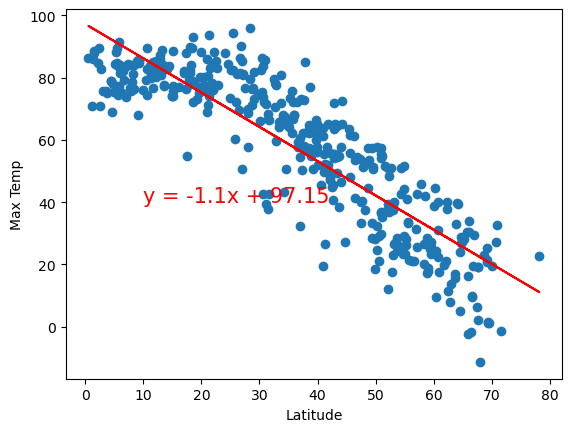

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, 
                       y_values, 
                       "Max Temp", 
                       (10,40))

The r-value is: 0.736080603652592


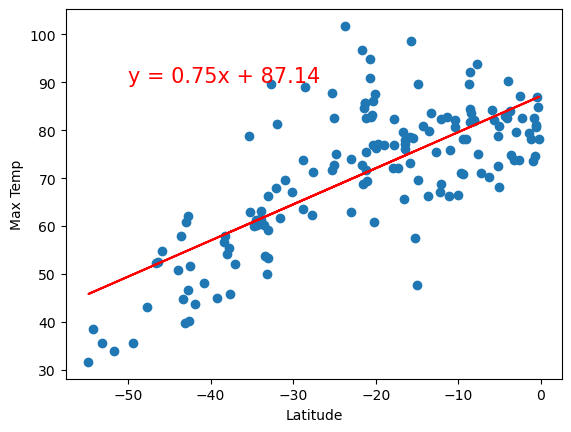

In [34]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, 
                       y_values, 
                       "Max Temp", 
                       (-50,90))

**Discussion about the linear relationship:** With both chart in mind, the slopes meet in the middle at 0 deg Latitude. This creates a bell curve.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15471514144940782


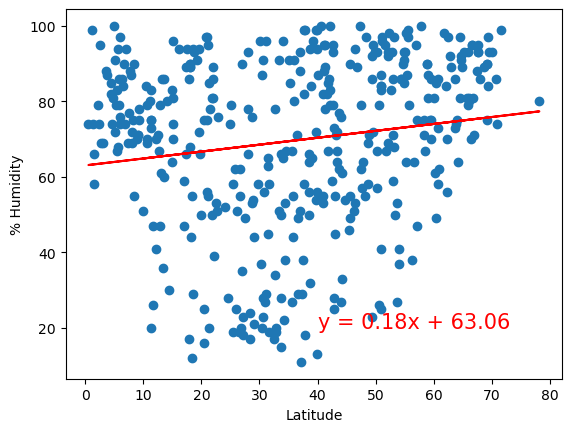

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "% Humidity", (40, 20))

The r-value is: 0.16263749572732117


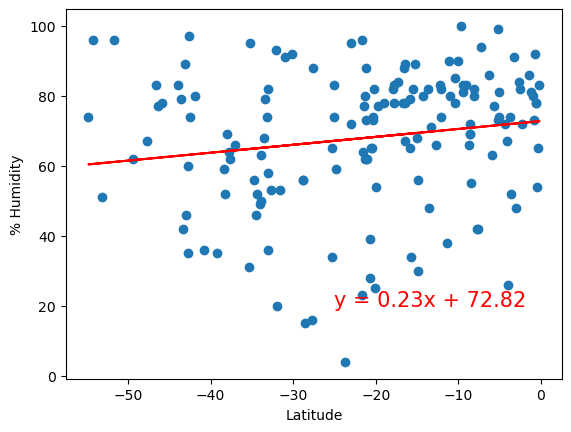

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "% Humidity", (-25, 20))

**Discussion about the linear relationship:** Oddly, it seems the higher you go on the planet, the humidity rises. Based on the slopes of each chart.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11528046933605753


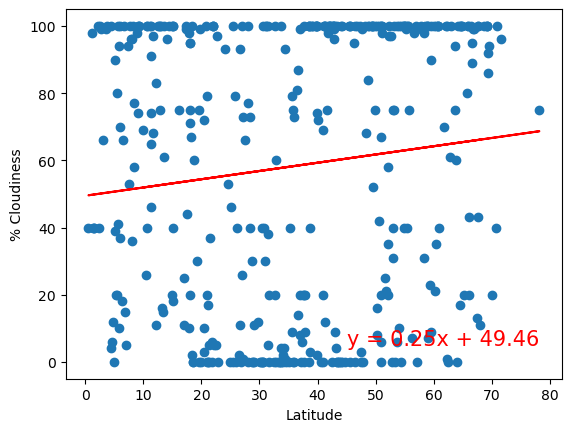

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "% Cloudiness", (45, 5))

The r-value is: 0.031218257327477687


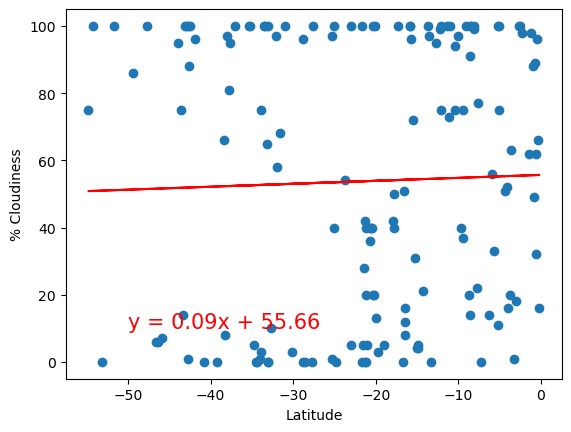

In [38]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "% Cloudiness", (-50, 10))

**Discussion about the linear relationship:** When you look at the northen chart, it's almost 100% or 0% cloudiness. The slope for the northern chart shows their is an upward trend going away from the equator, so their does seem to be more clouds the further way from the equator you are. The southern chart also shows an upward trend, this makes it look like the higher you go on the earth, the more clouds there is. This also might be because of the time of the year, the northern hemisphere is currently in fall, and spring for southern.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1341007510221883


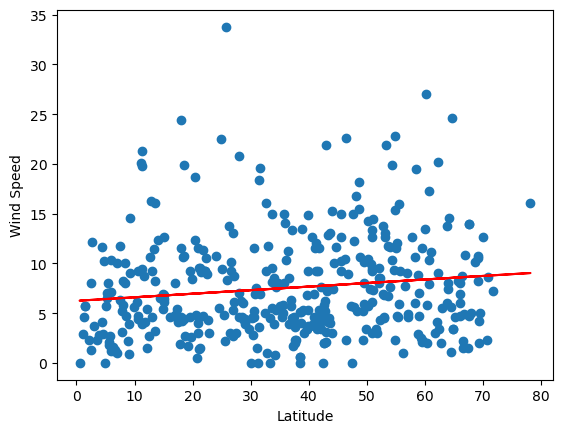

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (10, 40))

The r-value is: -0.2821616228803717


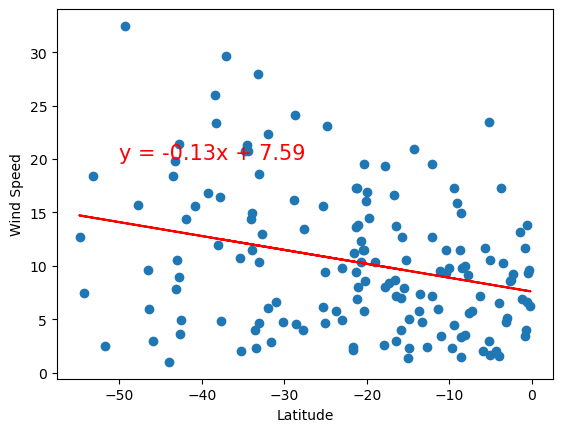

In [40]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 20))

**Discussion about the linear relationship:** Based on both graphs and the slopes of each, it seems the closer you get to the equator, the speed of the wind is slower. This also seems to be a negative bell curve.